In [1]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd

# Download stock data
ticker = "RELIANCE.NS"   # Indian stock
df = yf.download(ticker, start="2022-01-01", interval="1d")
name = ticker
print(df.head())


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker      RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS RELIANCE.NS
Date                                                                      
2022-01-03  1093.780518  1095.646128  1075.443589  1076.103370     5421611
2022-01-04  1118.465088  1119.784652  1093.848914  1099.263652    10847728
2022-01-05  1123.697632  1127.064782  1107.021470  1120.239614    11643813
2022-01-06  1099.536499  1116.599479  1096.123855  1115.325409    14447422
2022-01-07  1108.409302  1118.442271  1097.284238  1106.111499    13112115


In [3]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2026-01-21,1404.599976,1412.900024,1373.000000,1389.500000,17352720
2026-01-22,1402.500000,1419.500000,1395.000000,1410.099976,15721693
2026-01-23,1386.099976,1407.000000,1381.000000,1401.800049,9837802
2026-01-27,1380.500000,1391.599976,1368.000000,1380.000000,26302396
2026-01-28,1396.699951,1409.900024,1384.900024,1385.000000,11119252


In [4]:
df.columns = df.columns.get_level_values(0)
df.head()


Price,Close,High,Low,Open,Volume
Date,,,,,
2022-01-03,1093.780518,1095.646128,1075.443589,1076.103370,5421611
2022-01-04,1118.465088,1119.784652,1093.848914,1099.263652,10847728
2022-01-05,1123.697632,1127.064782,1107.021470,1120.239614,11643813
2022-01-06,1099.536499,1116.599479,1096.123855,1115.325409,14447422
2022-01-07,1108.409302,1118.442271,1097.284238,1106.111499,13112115


In [5]:
df.columns


Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2022-01-03 to 2026-01-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1007 non-null   float64
 1   High    1007 non-null   float64
 2   Low     1007 non-null   float64
 3   Open    1007 non-null   float64
 4   Volume  1007 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.2 KB


Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [7]:
df['Daily_Return'] = df['Close'].pct_change()
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

In [8]:
df['Trend'] = df['MA_20'] > df['MA_50']
df['Trend'] = df['Trend'].map({True: 'Uptrend', False: 'Downtrend'})

In [9]:
df['Volatility_20'] = df['Daily_Return'].rolling(20).std()

In [10]:
print(name)

RELIANCE.NS


In [11]:
!pip uninstall numpy -y
!pip install "numpy<2"


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Program Files\Python311\Lib\site-packages\pip\_internal\cli\base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Program Files\Python311\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "C:\Program Files\Python311\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "C:\Program Files\Python311\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "C:\Program Files\Python311\Lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Program Files\Python311\Lib\site-packages\pip\_vendor\tenacity\__init__.py", line 291, in wrapped_f
    return self(f, *args, **kw)
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python311\Lib\site-pack

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.13.0.90 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.13.0.90 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import numpy as np
np.__version__

'1.26.4'

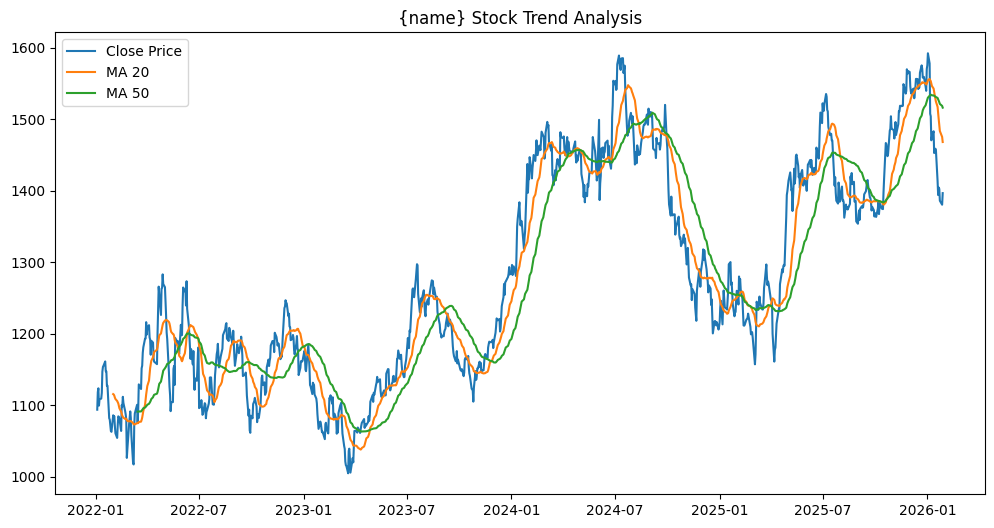

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA_20'], label='MA 20')
plt.plot(df['MA_50'], label='MA 50')
plt.legend()
plt.title("{name} Stock Trend Analysis")
plt.show()


In [14]:
df['Daily_Return'] = df['Close'].pct_change()

In [15]:
df['Volatility_20'] = df['Daily_Return'].rolling(20).std()

In [16]:
df['Signal'] = 0
df.loc[df['MA_20'] > df['MA_50'], 'Signal'] = 1
df.loc[df['MA_20'] < df['MA_50'], 'Signal'] = -1

In [17]:
period="3y"

In [18]:

df['Signal'] = 0
df.loc[df['MA_20'] > df['MA_50'], 'Signal'] = 1
df.loc[df['MA_20'] < df['MA_50'], 'Signal'] = 0

# Detect actual trade points (crossovers)
df['Position'] = df['Signal'].diff()


In [19]:
# Daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Strategy returns (shift to avoid look-ahead bias)
df['Strategy_Return'] = df['Signal'].shift(1) * df['Daily_Return']


In [20]:
df['Cumulative_Market_Return'] = (1 + df['Daily_Return']).cumprod()
df['Cumulative_Strategy_Return'] = (1 + df['Strategy_Return']).cumprod()

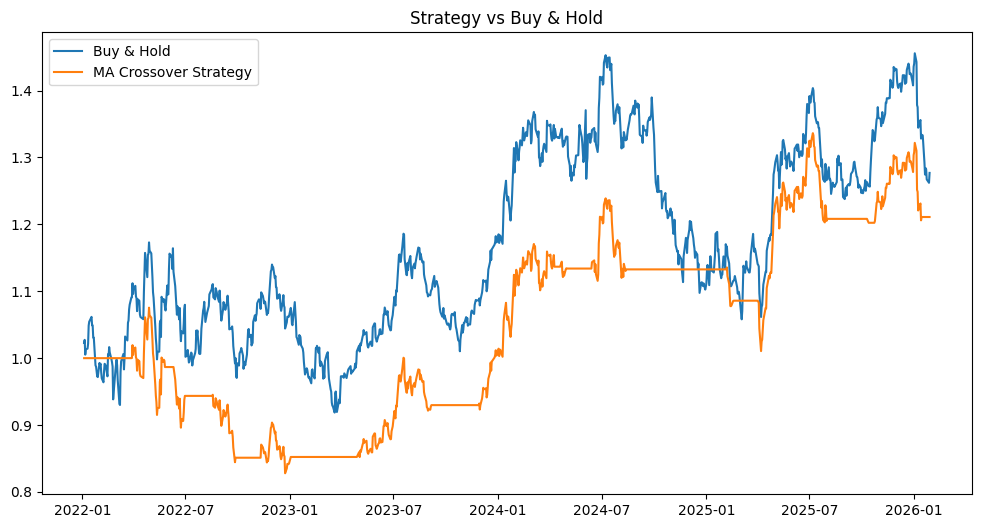

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Cumulative_Market_Return'], label='Buy & Hold')
plt.plot(df.index, df['Cumulative_Strategy_Return'], label='MA Crossover Strategy')
plt.legend()
plt.title("Strategy vs Buy & Hold")
plt.show()


In [22]:
total_return = df['Cumulative_Strategy_Return'].iloc[-1] - 1
market_return = df['Cumulative_Market_Return'].iloc[-1] - 1

strategy_vol = df['Strategy_Return'].std() * np.sqrt(252)
market_vol = df['Daily_Return'].std() * np.sqrt(252)

print(f"Strategy Return: {total_return:.2%}")
print(f"Market Return: {market_return:.2%}")
print(f"Strategy Volatility: {strategy_vol:.2%}")
print(f"Market Volatility: {market_vol:.2%}")


Strategy Return: 21.10%
Market Return: 27.69%
Strategy Volatility: 15.07%
Market Volatility: 21.93%
